In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#progress bar
from tqdm.notebook import tqdm
import os

# set the working directory
os.chdir('C:\\Users\ctspa\\Documents\\2021DataThon\\Competition')

In [2]:
# get the data directories
dir_eaglebine = 'Eaglebine/Eaglebine/'

In [3]:
# read in the well header files
Eag_Head = pd.read_excel(dir_eaglebine+'Eaglebine well headers SPE April 21 2021.xlsx')
display(Eag_Head.head())

,td,Elevation,ElevationDatum,displayapi,WGS84Latitude,WGS84Longitude,SurfLat,SurfLong,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,BottomLatitude_NAD83,BottomLongitude_NAD83,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27
0,19635,338.68,KB,42013301410000,NaN,NaN,NaN,NaN,28.690101,-98.469817,28.690101,-98.469817,28.689839,-98.469523,28.689839,-98.469523
1,10775,384.59,KB,42013301930000,NaN,NaN,NaN,NaN,28.780042,-98.208395,28.780042,-98.208396,28.779784,-98.208109,28.779784,-98.208109
2,6175,442.00,KB,42013302760000,NaN,NaN,NaN,NaN,28.994810,-98.422767,28.994810,-98.422767,28.994561,-98.422475,28.994561,-98.422475
3,8198,392.00,KB,42013305480000,NaN,NaN,NaN,NaN,28.963395,-98.295961,28.963395,-98.295961,28.963144,-98.295673,28.963144,-98.295672
4,11000,493.23,KB,42013310190000,NaN,NaN,NaN,NaN,28.817939,-98.155472,28.817939,-98.155472,28.817682,-98.155187,28.817682,-98.155187


In [4]:
display(Eag_Head.columns)

Index(['td', 'Elevation', 'ElevationDatum', 'displayapi', 'WGS84Latitude',
       'WGS84Longitude', 'SurfLat', 'SurfLong', 'SurfaceLatitude_NAD83',
       'SurfaceLongitude_NAD83', 'BottomLatitude_NAD83',
       'BottomLongitude_NAD83', 'SurfaceLatitude_NAD27',
       'SurfaceLongitude_NAD27', 'BottomLatitude_NAD27',
       'BottomLongitude_NAD27'],
      dtype='object')

In [5]:
print(Eag_Head.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   td                      324 non-null    int64  
 1   Elevation               324 non-null    float64
 2   ElevationDatum          324 non-null    object 
 3   displayapi              324 non-null    int64  
 4   WGS84Latitude           16 non-null     float64
 5   WGS84Longitude          16 non-null     float64
 6   SurfLat                 16 non-null     float64
 7   SurfLong                16 non-null     float64
 8   SurfaceLatitude_NAD83   308 non-null    float64
 9   SurfaceLongitude_NAD83  308 non-null    float64
 10  BottomLatitude_NAD83    308 non-null    float64
 11  BottomLongitude_NAD83   308 non-null    float64
 12  SurfaceLatitude_NAD27   308 non-null    float64
 13  SurfaceLongitude_NAD27  308 non-null    float64
 14  BottomLatitude_NAD27    308 non-null    fl

In [6]:
# Need to move the coordinates of 16 wells into the 308 wells to create coordinates for 324 wells
# assume the information provided is correct for the current NAD83 standard
WorkerDF = Eag_Head[Eag_Head["SurfLat"]>0]
#WorkerDF
# Move the data over, assuming a one to one thingie works
value = 0.0
for wellname in WorkerDF["displayapi"]:
    value = WorkerDF.loc[WorkerDF["displayapi"]==wellname, "SurfLat"].item()        
    Eag_Head.loc[Eag_Head["displayapi"]==wellname, "SurfaceLatitude_NAD83"] = value
    value = WorkerDF.loc[WorkerDF["displayapi"]==wellname,"SurfLong"].item()
    Eag_Head.loc[Eag_Head["displayapi"]==wellname, "SurfaceLongitude_NAD83"] = value
    value = WorkerDF.loc[WorkerDF["displayapi"]==wellname,"WGS84Latitude"].item()    
    Eag_Head.loc[Eag_Head["displayapi"]==wellname, "BottomLatitude_NAD83"] = value
    value =  WorkerDF.loc[WorkerDF["displayapi"]==wellname,"WGS84Longitude"].item()
    Eag_Head.loc[Eag_Head["displayapi"]==wellname, "BottomLongitude_NAD83"] = value

In [7]:
# seemed to have worked, maybe a btter approach would have been to doublecheck with other files
# now move the data back into the main dataframe
print(Eag_Head.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   td                      324 non-null    int64  
 1   Elevation               324 non-null    float64
 2   ElevationDatum          324 non-null    object 
 3   displayapi              324 non-null    int64  
 4   WGS84Latitude           16 non-null     float64
 5   WGS84Longitude          16 non-null     float64
 6   SurfLat                 16 non-null     float64
 7   SurfLong                16 non-null     float64
 8   SurfaceLatitude_NAD83   324 non-null    float64
 9   SurfaceLongitude_NAD83  324 non-null    float64
 10  BottomLatitude_NAD83    324 non-null    float64
 11  BottomLongitude_NAD83   324 non-null    float64
 12  SurfaceLatitude_NAD27   308 non-null    float64
 13  SurfaceLongitude_NAD27  308 non-null    float64
 14  BottomLatitude_NAD27    308 non-null    fl

In [8]:
# read in the DST BHT file
Eag_BHT = pd.read_excel(dir_eaglebine+'Eaglebine BHT TSC data for SPE April 21 2020.xlsx')
display(Eag_BHT.head())

,UWI,SurfLat,SurfLong,TD (ft),GL(ft),BHT_below sea level (ft),BHT_ subsurface (ft),BHTorMRT (maximum recorded temperature) oF,TSC or ORT (time since circulation or original recorded time in hours)
0,42013301410000,28.690426,-98.470138,19629.0,345.90,12222.50,12568.4,143.0,5.50
1,42013301930000,28.779921,-98.208313,10775.0,397.40,10396.00,10793.4,225.0,11.00
2,42013302760000,28.994360,-98.421799,6168.0,460.40,5733.00,6193.4,150.0,5.50
3,42013305480000,28.759118,-98.156410,8198.0,410.40,7806.00,8216.4,170.0,5.00
4,42013310190000,28.817400,-98.155319,11000.0,508.92,10509.48,11018.4,210.0,7.75


In [9]:
Eag_BHT.columns

Index(['UWI', 'SurfLat', 'SurfLong', 'TD (ft)', 'GL(ft)',
       'BHT_below sea level (ft)', 'BHT_ subsurface (ft)',
       'BHTorMRT (maximum recorded temperature) oF',
       'TSC or ORT (time since circulation or original recorded time in hours)'],
      dtype='object')

In [10]:
# read in the production summary file
Eag_Prd = pd.read_excel(dir_eaglebine+'EagleBine Casing production summary for SPE April21 2020.xlsx')
Eag_Prd.head()

,UWI,MinCasingSize\,spuddate,completiondate,cumoil,cumgas,cumwater
0,4201330193,5.500,NaN,1972-07-22,6140.000,8702967.000,1002330.677
1,4201330276,4.500,NaN,1975-07-28,1929.332,7.992,0.000
2,4201330548,2.875,1977-01-23,1977-02-24,0.000,10067.000,0.000
3,4201331174,2.375,1981-04-28,1981-06-11,3697.000,5679789.000,37521.613
4,4201331314,2.375,NaN,1982-04-20,69.000,2.000,0.000


In [11]:
Eag_Prd.columns

Index(['UWI', 'MinCasingSize\', 'spuddate', 'completiondate', 'cumoil',
       'cumgas', 'cumwater'],
      dtype='object')

In [12]:
# need to get rid of the end of line character
Eag_Prd.rename(columns={'MinCasingSize\\':'MinCasingSize'},inplace=True)
Eag_Prd.columns

Index(['UWI', 'MinCasingSize', 'spuddate', 'completiondate', 'cumoil',
       'cumgas', 'cumwater'],
      dtype='object')

In [13]:
# try to get rid of the rows with no production information
Eag_Prd.dropna(inplace=True)
Eag_Prd.head()

,UWI,MinCasingSize,spuddate,completiondate,cumoil,cumgas,cumwater
2,4201330548,2.875,1977-01-23,1977-02-24,0.0,10067.0,0.000
3,4201331174,2.375,1981-04-28,1981-06-11,3697.0,5679789.0,37521.613
5,4201331378,4.500,1983-06-29,1983-07-01,85.0,1.0,0.000
6,4201332664,5.500,1984-06-04,1984-06-24,228.0,5717005.0,31942.229
7,4201333977,7.000,1992-08-15,1992-09-09,0.0,773076.0,8822.020


In [14]:
# drop the columns with superfluous data
# Eag_Prd.drop(columns="MinCasingSize",inplace=True)

In [15]:
Eag_Prd.columns

Index(['UWI', 'MinCasingSize', 'spuddate', 'completiondate', 'cumoil',
       'cumgas', 'cumwater'],
      dtype='object')

In [16]:
Eag_Prd["UWI"]=Eag_Prd["UWI"].astype("str")
Eag_Prd["UWI"]=Eag_Prd["UWI"]+"0000"
print(Eag_Prd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 2 to 265
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UWI             141 non-null    object 
 1   MinCasingSize   141 non-null    float64
 2   spuddate        141 non-null    object 
 3   completiondate  141 non-null    object 
 4   cumoil          141 non-null    float64
 5   cumgas          141 non-null    float64
 6   cumwater        141 non-null    float64
dtypes: float64(4), object(3)
memory usage: 8.8+ KB
None


In [17]:
# now read in the true temperature 
Eag_TrueTemp = pd.read_excel(dir_eaglebine+'Eaglebine TrueTemp_Train2.xlsx')
Eag_TrueTemp.head()

,UWI,Depth sub-sea (feet),True Temperature (oF)
0,42013301410000,-350,70.33
1,42013301410000,-300,70.33
2,42013301410000,-250,70.33
3,42013301410000,-200,71.49
4,42013301410000,-150,72.66


In [18]:
# put together the well head file with the DST BHT file
Eag_Head_BHT=pd.merge(Eag_Head,Eag_BHT,how="inner",left_on="displayapi",right_on="UWI",sort=False)
Eag_Head_BHT.head()

,td,Elevation,ElevationDatum,displayapi,WGS84Latitude,WGS84Longitude,SurfLat_x,SurfLong_x,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,...,BottomLongitude_NAD27,UWI,SurfLat_y,SurfLong_y,TD (ft),GL(ft),BHT_below sea level (ft),BHT_ subsurface (ft),BHTorMRT (maximum recorded temperature) oF,TSC or ORT (time since circulation or original recorded time in hours)
0,19635,338.68,KB,42013301410000,NaN,NaN,NaN,NaN,28.690101,-98.469817,...,-98.469523,42013301410000,28.690426,-98.470138,19629.0,345.90,12222.50,12568.4,143.0,5.50
1,10775,384.59,KB,42013301930000,NaN,NaN,NaN,NaN,28.780042,-98.208395,...,-98.208109,42013301930000,28.779921,-98.208313,10775.0,397.40,10396.00,10793.4,225.0,11.00
2,6175,442.00,KB,42013302760000,NaN,NaN,NaN,NaN,28.994810,-98.422767,...,-98.422475,42013302760000,28.994360,-98.421799,6168.0,460.40,5733.00,6193.4,150.0,5.50
3,8198,392.00,KB,42013305480000,NaN,NaN,NaN,NaN,28.963395,-98.295961,...,-98.295672,42013305480000,28.759118,-98.156410,8198.0,410.40,7806.00,8216.4,170.0,5.00
4,11000,493.23,KB,42013310190000,NaN,NaN,NaN,NaN,28.817939,-98.155472,...,-98.155187,42013310190000,28.817400,-98.155319,11000.0,508.92,10509.48,11018.4,210.0,7.75


In [19]:
Eag_Head_BHT.columns

Index(['td', 'Elevation', 'ElevationDatum', 'displayapi', 'WGS84Latitude',
       'WGS84Longitude', 'SurfLat_x', 'SurfLong_x', 'SurfaceLatitude_NAD83',
       'SurfaceLongitude_NAD83', 'BottomLatitude_NAD83',
       'BottomLongitude_NAD83', 'SurfaceLatitude_NAD27',
       'SurfaceLongitude_NAD27', 'BottomLatitude_NAD27',
       'BottomLongitude_NAD27', 'UWI', 'SurfLat_y', 'SurfLong_y', 'TD (ft)',
       'GL(ft)', 'BHT_below sea level (ft)', 'BHT_ subsurface (ft)',
       'BHTorMRT (maximum recorded temperature) oF',
       'TSC or ORT (time since circulation or original recorded time in hours)'],
      dtype='object')

In [20]:
# drop the columns with all the useless data
Eag_MeasTemp=Eag_Head_BHT.drop(columns=["td", 'ElevationDatum', "displayapi",'SurfLat_x', 'SurfLong_x',
        'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27', 'SurfLat_y', 'SurfLong_y',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27','WGS84Latitude', 'WGS84Longitude', "Elevation"])
Eag_MeasTemp.head()

,SurfaceLatitude_NAD83,SurfaceLongitude_NAD83,BottomLatitude_NAD83,BottomLongitude_NAD83,UWI,TD (ft),GL(ft),BHT_below sea level (ft),BHT_ subsurface (ft),BHTorMRT (maximum recorded temperature) oF,TSC or ORT (time since circulation or original recorded time in hours)
0,28.690101,-98.469817,28.690101,-98.469817,42013301410000,19629.0,345.90,12222.50,12568.4,143.0,5.50
1,28.780042,-98.208395,28.780042,-98.208396,42013301930000,10775.0,397.40,10396.00,10793.4,225.0,11.00
2,28.994810,-98.422767,28.994810,-98.422767,42013302760000,6168.0,460.40,5733.00,6193.4,150.0,5.50
3,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.00
4,28.817939,-98.155472,28.817939,-98.155472,42013310190000,11000.0,508.92,10509.48,11018.4,210.0,7.75


In [21]:
# rename the columns to somethign tha makes sense
Eag_MeasTemp.rename(columns={"GL(ft)":"Ele(ft)","TD (ft)":"TD(ft)",
                             "SurfaceLatitude_NAD83":"TopLat","SurfaceLongitude_NAD83":"TopLon",
                             "BottomLatitude_NAD83":"BotLat","BottomLongitude_NAD83":"BotLon",
                             "BHT_below sea level (ft)":"DST_SS(ft)","BHT_ subsurface (ft)":"DST_MD(ft)",
                             "BHTorMRT (maximum recorded temperature) oF":"DSTTemp(oF)",
                             "TSC or ORT (time since circulation or original recorded time in hours)":"DSTTime"},inplace=True)
Eag_MeasTemp.head()

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime
0,28.690101,-98.469817,28.690101,-98.469817,42013301410000,19629.0,345.90,12222.50,12568.4,143.0,5.50
1,28.780042,-98.208395,28.780042,-98.208396,42013301930000,10775.0,397.40,10396.00,10793.4,225.0,11.00
2,28.994810,-98.422767,28.994810,-98.422767,42013302760000,6168.0,460.40,5733.00,6193.4,150.0,5.50
3,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.00
4,28.817939,-98.155472,28.817939,-98.155472,42013310190000,11000.0,508.92,10509.48,11018.4,210.0,7.75


In [22]:
Eag_MeasTemp["UWI"]=Eag_MeasTemp["UWI"].astype("str")

In [23]:
print(Eag_MeasTemp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopLat       324 non-null    float64
 1   TopLon       324 non-null    float64
 2   BotLat       324 non-null    float64
 3   BotLon       324 non-null    float64
 4   UWI          324 non-null    object 
 5   TD(ft)       324 non-null    float64
 6   Ele(ft)      324 non-null    float64
 7   DST_SS(ft)   324 non-null    float64
 8   DST_MD(ft)   324 non-null    float64
 9   DSTTemp(oF)  324 non-null    float64
 10  DSTTime      324 non-null    float64
dtypes: float64(10), object(1)
memory usage: 30.4+ KB
None


In [24]:
# check which wells will not be used for training (that is validation by SPE)
set_assign=pd.read_csv("set_assign.csv")
# and merge with the head and BHT file to check which wells belong where 
Eag_MT_Set=pd.merge(Eag_MeasTemp,set_assign,how="inner",left_on="UWI",right_on="UWI",sort=False)
Eag_MT_Set.head()

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime,Set
0,28.690101,-98.469817,28.690101,-98.469817,42013301410000,19629.0,345.90,12222.50,12568.4,143.0,5.50,Training
1,28.780042,-98.208395,28.780042,-98.208396,42013301930000,10775.0,397.40,10396.00,10793.4,225.0,11.00,Training
2,28.994810,-98.422767,28.994810,-98.422767,42013302760000,6168.0,460.40,5733.00,6193.4,150.0,5.50,Training
3,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.00,Training
4,28.817939,-98.155472,28.817939,-98.155472,42013310190000,11000.0,508.92,10509.48,11018.4,210.0,7.75,Training


In [25]:
print(Eag_MT_Set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopLat       322 non-null    float64
 1   TopLon       322 non-null    float64
 2   BotLat       322 non-null    float64
 3   BotLon       322 non-null    float64
 4   UWI          322 non-null    object 
 5   TD(ft)       322 non-null    float64
 6   Ele(ft)      322 non-null    float64
 7   DST_SS(ft)   322 non-null    float64
 8   DST_MD(ft)   322 non-null    float64
 9   DSTTemp(oF)  322 non-null    float64
 10  DSTTime      322 non-null    float64
 11  Set          322 non-null    object 
dtypes: float64(10), object(2)
memory usage: 32.7+ KB
None


In [26]:
Eag_MT_tra = Eag_MT_Set[Eag_MT_Set["Set"]=="Training"]
print(Eag_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 321
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopLat       243 non-null    float64
 1   TopLon       243 non-null    float64
 2   BotLat       243 non-null    float64
 3   BotLon       243 non-null    float64
 4   UWI          243 non-null    object 
 5   TD(ft)       243 non-null    float64
 6   Ele(ft)      243 non-null    float64
 7   DST_SS(ft)   243 non-null    float64
 8   DST_MD(ft)   243 non-null    float64
 9   DSTTemp(oF)  243 non-null    float64
 10  DSTTime      243 non-null    float64
 11  Set          243 non-null    object 
dtypes: float64(10), object(2)
memory usage: 24.7+ KB
None


In [27]:
Eag_MT_val = Eag_MT_Set[Eag_MT_Set["Set"]=="Validation_Testing"]
print(Eag_MT_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 12 to 319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopLat       79 non-null     float64
 1   TopLon       79 non-null     float64
 2   BotLat       79 non-null     float64
 3   BotLon       79 non-null     float64
 4   UWI          79 non-null     object 
 5   TD(ft)       79 non-null     float64
 6   Ele(ft)      79 non-null     float64
 7   DST_SS(ft)   79 non-null     float64
 8   DST_MD(ft)   79 non-null     float64
 9   DSTTemp(oF)  79 non-null     float64
 10  DSTTime      79 non-null     float64
 11  Set          79 non-null     object 
dtypes: float64(10), object(2)
memory usage: 8.0+ KB
None


In [28]:
Eag_MeasTemp_WithPrd=pd.merge(Eag_MeasTemp,Eag_Prd,left_on="UWI",right_on="UWI", sort=False)
Eag_MeasTemp_WithPrd.head()

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime,MinCasingSize,spuddate,completiondate,cumoil,cumgas,cumwater
0,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.0,2.875,1977-01-23,1977-02-24,0.0,10067.0,0.000
1,28.819269,-98.151356,28.819269,-98.151356,42013311740000,10956.0,527.93,10340.47,10868.4,245.0,9.0,2.375,1981-04-28,1981-06-11,3697.0,5679789.0,37521.613
2,28.851374,-98.772159,28.851375,-98.772159,42013313780000,7288.0,516.15,6170.25,6686.4,149.0,7.0,4.500,1983-06-29,1983-07-01,85.0,1.0,0.000
3,28.825492,-98.149239,28.825493,-98.149239,42013326640000,11010.0,541.80,10486.60,11028.4,230.0,14.0,5.500,1984-06-04,1984-06-24,228.0,5717005.0,31942.229
4,28.794433,-98.195483,28.794434,-98.195483,42013339770000,11000.0,483.40,10535.00,11018.4,237.0,6.0,7.000,1992-08-15,1992-09-09,0.0,773076.0,8822.020


In [29]:
Eag_MTP_tra=pd.merge(Eag_MT_tra,Eag_Prd,on="UWI",sort=False)
Eag_MTP_tra.head()

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime,Set,MinCasingSize,spuddate,completiondate,cumoil,cumgas,cumwater
0,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.0,Training,2.875,1977-01-23,1977-02-24,0.0,10067.0,0.000
1,28.819269,-98.151356,28.819269,-98.151356,42013311740000,10956.0,527.93,10340.47,10868.4,245.0,9.0,Training,2.375,1981-04-28,1981-06-11,3697.0,5679789.0,37521.613
2,28.851374,-98.772159,28.851375,-98.772159,42013313780000,7288.0,516.15,6170.25,6686.4,149.0,7.0,Training,4.500,1983-06-29,1983-07-01,85.0,1.0,0.000
3,28.825492,-98.149239,28.825493,-98.149239,42013326640000,11010.0,541.80,10486.60,11028.4,230.0,14.0,Training,5.500,1984-06-04,1984-06-24,228.0,5717005.0,31942.229
4,28.826314,-98.142291,28.826314,-98.142291,42013339790000,11042.0,526.40,10534.00,11060.4,242.0,8.0,Training,5.500,1992-10-06,1992-10-24,126995.0,223739.0,0.000


In [30]:
print(Eag_MTP_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TopLat          105 non-null    float64
 1   TopLon          105 non-null    float64
 2   BotLat          105 non-null    float64
 3   BotLon          105 non-null    float64
 4   UWI             105 non-null    object 
 5   TD(ft)          105 non-null    float64
 6   Ele(ft)         105 non-null    float64
 7   DST_SS(ft)      105 non-null    float64
 8   DST_MD(ft)      105 non-null    float64
 9   DSTTemp(oF)     105 non-null    float64
 10  DSTTime         105 non-null    float64
 11  Set             105 non-null    object 
 12  MinCasingSize   105 non-null    float64
 13  spuddate        105 non-null    object 
 14  completiondate  105 non-null    object 
 15  cumoil          105 non-null    float64
 16  cumgas          105 non-null    float64
 17  cumwater        105 non-null    flo

In [31]:
Eag_MTP_val=pd.merge(Eag_MT_val,Eag_Prd,on="UWI",sort=False)
Eag_MTP_tra.head()

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime,Set,MinCasingSize,spuddate,completiondate,cumoil,cumgas,cumwater
0,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.0,Training,2.875,1977-01-23,1977-02-24,0.0,10067.0,0.000
1,28.819269,-98.151356,28.819269,-98.151356,42013311740000,10956.0,527.93,10340.47,10868.4,245.0,9.0,Training,2.375,1981-04-28,1981-06-11,3697.0,5679789.0,37521.613
2,28.851374,-98.772159,28.851375,-98.772159,42013313780000,7288.0,516.15,6170.25,6686.4,149.0,7.0,Training,4.500,1983-06-29,1983-07-01,85.0,1.0,0.000
3,28.825492,-98.149239,28.825493,-98.149239,42013326640000,11010.0,541.80,10486.60,11028.4,230.0,14.0,Training,5.500,1984-06-04,1984-06-24,228.0,5717005.0,31942.229
4,28.826314,-98.142291,28.826314,-98.142291,42013339790000,11042.0,526.40,10534.00,11060.4,242.0,8.0,Training,5.500,1992-10-06,1992-10-24,126995.0,223739.0,0.000


In [32]:
print(Eag_MTP_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TopLat          35 non-null     float64
 1   TopLon          35 non-null     float64
 2   BotLat          35 non-null     float64
 3   BotLon          35 non-null     float64
 4   UWI             35 non-null     object 
 5   TD(ft)          35 non-null     float64
 6   Ele(ft)         35 non-null     float64
 7   DST_SS(ft)      35 non-null     float64
 8   DST_MD(ft)      35 non-null     float64
 9   DSTTemp(oF)     35 non-null     float64
 10  DSTTime         35 non-null     float64
 11  Set             35 non-null     object 
 12  MinCasingSize   35 non-null     float64
 13  spuddate        35 non-null     object 
 14  completiondate  35 non-null     object 
 15  cumoil          35 non-null     float64
 16  cumgas          35 non-null     float64
 17  cumwater        35 non-null     float

In [33]:
print(Eag_MeasTemp_WithPrd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TopLat          141 non-null    float64
 1   TopLon          141 non-null    float64
 2   BotLat          141 non-null    float64
 3   BotLon          141 non-null    float64
 4   UWI             141 non-null    object 
 5   TD(ft)          141 non-null    float64
 6   Ele(ft)         141 non-null    float64
 7   DST_SS(ft)      141 non-null    float64
 8   DST_MD(ft)      141 non-null    float64
 9   DSTTemp(oF)     141 non-null    float64
 10  DSTTime         141 non-null    float64
 11  MinCasingSize   141 non-null    float64
 12  spuddate        141 non-null    object 
 13  completiondate  141 non-null    object 
 14  cumoil          141 non-null    float64
 15  cumgas          141 non-null    float64
 16  cumwater        141 non-null    float64
dtypes: float64(14), object(3)
memory us

In [34]:
# Now we need a file with relevant depths in _SS(m) and drop everything else for now
Eag_Check=pd.DataFrame()
Eag_Check["UWI"]=Eag_MT_tra["UWI"]
Eag_Check["TD_SS(ft)"]=Eag_MT_tra["TD(ft)"]-Eag_MT_tra["Ele(ft)"]+100
Eag_Check["DST_SS(ft)"]=Eag_MT_tra["DST_SS(ft)"]
Eag_Check.head()

,UWI,TD_SS(ft),DST_SS(ft)
0,42013301410000,19383.10,12222.50
1,42013301930000,10477.60,10396.00
2,42013302760000,5807.60,5733.00
3,42013305480000,7887.60,7806.00
4,42013310190000,10591.08,10509.48


In [35]:
print(Eag_Check.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 321
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UWI         243 non-null    object 
 1   TD_SS(ft)   243 non-null    float64
 2   DST_SS(ft)  243 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.6+ KB
None


In [36]:
Eag_TrueTemp.columns

Index(['UWI', 'Depth sub-sea (feet)', 'True Temperature   (oF)'], dtype='object')

In [37]:
Eag_TrueTemp["UWI"]=Eag_TrueTemp["UWI"].astype("str")

In [38]:
Eag_TrueTemp.rename(columns={'Depth sub-sea (feet)':"Depth(ft)", 'True Temperature   (oF)':"TrueTemp(oF)"}, inplace=True)
print(Eag_TrueTemp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66389 entries, 0 to 66388
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UWI           66389 non-null  object 
 1   Depth(ft)     66389 non-null  int64  
 2   TrueTemp(oF)  66389 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB
None


In [39]:
Eag_Check["DST_SS(ft)"]

0      12222.50
1      10396.00
2       5733.00
3       7806.00
4      10509.48
         ...   
315     6481.20
316     6876.00
318     4254.00
320     6329.55
321     3246.50
Name: DST_SS(ft), Length: 243, dtype: float64

In [40]:
Eag_Check["TD_SS(ft)"]

0      19383.10
1      10477.60
2       5807.60
3       7887.60
4      10591.08
         ...   
315     6581.80
316     6957.60
318    15485.60
320     6451.15
321     3328.10
Name: TD_SS(ft), Length: 243, dtype: float64

In [41]:
Eag_Check["UWI"]

0      42013301410000
1      42013301930000
2      42013302760000
3      42013305480000
4      42013310190000
            ...      
315    42493318190000
316    42493319370000
318    42507007550000
320    42507312960000
321    42507326870000
Name: UWI, Length: 243, dtype: object

In [42]:
Eag_Check

,UWI,TD_SS(ft),DST_SS(ft)
0,42013301410000,19383.10,12222.50
1,42013301930000,10477.60,10396.00
2,42013302760000,5807.60,5733.00
3,42013305480000,7887.60,7806.00
4,42013310190000,10591.08,10509.48
...,...,...,...
315,42493318190000,6581.80,6481.20
316,42493319370000,6957.60,6876.00
318,42507007550000,15485.60,4254.00
320,42507312960000,6451.15,6329.55


In [43]:
Eag_Check.dropna()

,UWI,TD_SS(ft),DST_SS(ft)
0,42013301410000,19383.10,12222.50
1,42013301930000,10477.60,10396.00
2,42013302760000,5807.60,5733.00
3,42013305480000,7887.60,7806.00
4,42013310190000,10591.08,10509.48
...,...,...,...
315,42493318190000,6581.80,6481.20
316,42493319370000,6957.60,6876.00
318,42507007550000,15485.60,4254.00
320,42507312960000,6451.15,6329.55


In [44]:
for wellname in Eag_Check["UWI"]:
    value =  Eag_TrueTemp[(wellname==Eag_TrueTemp["UWI"])]["Depth(ft)"].max()
    Eag_Check.loc[Eag_Check["UWI"]==wellname, "MaxDepthTT"] = value    
    
Eag_Check.dropna(inplace=True)

In [45]:
Eag_Check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 321
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UWI         243 non-null    object 
 1   TD_SS(ft)   243 non-null    float64
 2   DST_SS(ft)  243 non-null    float64
 3   MaxDepthTT  243 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.5+ KB


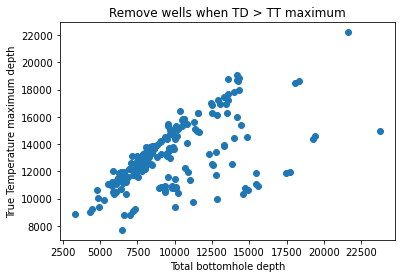

In [46]:
import matplotlib.pyplot as plt

x=Eag_Check["TD_SS(ft)"]
y=Eag_Check["MaxDepthTT"]

plt.xlabel("Total bottomhole depth")
plt.ylabel("True Temperature maximum depth")
plt.title("Remove wells when TD > TT maximum")

plt.scatter(x, y)
plt.show()

In [47]:
Eag_Check[Eag_Check["TD_SS(ft)"]>Eag_Check["MaxDepthTT"]]

,UWI,TD_SS(ft),DST_SS(ft),MaxDepthTT
0,42013301410000,19383.1,12222.5,14600.0
160,42161304400000,14905.6,14824.0,10650.0
233,42289301060000,14707.6,8889.0,10800.0
234,42289303540000,14867.2,14489.6,14500.0
249,42289312310000,17468.5,8586.9,11900.0
250,42289312660000,17743.6,9598.0,11950.0
251,42289312770000,12751.6,6090.0,11750.0
258,42289315440000,15605.6,13388.0,10950.0
261,42293304380000,12819.6,4235.0,9950.0
266,42293312300000,13839.6,12493.0,12550.0


In [48]:
# drop the annoying values where measured depth is more than than truedepth
indexnames = Eag_Check[(Eag_Check['TD_SS(ft)'] > Eag_Check["MaxDepthTT"])].index
Eag_Check.drop(indexnames,inplace=True)

In [49]:
Eag_Check

,UWI,TD_SS(ft),DST_SS(ft),MaxDepthTT
1,42013301930000,10477.60,10396.00,15750.0
2,42013302760000,5807.60,5733.00,11200.0
3,42013305480000,7887.60,7806.00,12700.0
4,42013310190000,10591.08,10509.48,15800.0
5,42013311740000,10528.07,10340.47,15800.0
...,...,...,...,...
314,42493317790000,6078.80,5997.20,11250.0
315,42493318190000,6581.80,6481.20,11600.0
316,42493319370000,6957.60,6876.00,12200.0
320,42507312960000,6451.15,6329.55,7700.0


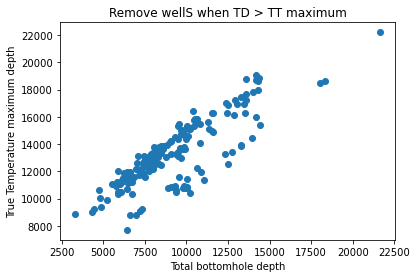

In [50]:
import matplotlib.pyplot as plt

x=Eag_Check["TD_SS(ft)"]
y=Eag_Check["MaxDepthTT"]

plt.xlabel("Total bottomhole depth")
plt.ylabel("True Temperature maximum depth")
plt.title("Remove wellS when TD > TT maximum")

plt.scatter(x, y)
plt.show()

In [51]:
Eag_MT_tra

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime,Set
0,28.690101,-98.469817,28.690101,-98.469817,42013301410000,19629.0,345.90,12222.50,12568.4,143.0,5.50,Training
1,28.780042,-98.208395,28.780042,-98.208396,42013301930000,10775.0,397.40,10396.00,10793.4,225.0,11.00,Training
2,28.994810,-98.422767,28.994810,-98.422767,42013302760000,6168.0,460.40,5733.00,6193.4,150.0,5.50,Training
3,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.00,Training
4,28.817939,-98.155472,28.817939,-98.155472,42013310190000,11000.0,508.92,10509.48,11018.4,210.0,7.75,Training
...,...,...,...,...,...,...,...,...,...,...,...,...
315,29.078411,-98.110357,29.078411,-98.110357,42493318190000,6919.0,437.20,6481.20,6918.4,170.0,3.00,Training
316,29.032056,-98.174977,29.032057,-98.174977,42493319370000,7320.0,462.40,6876.00,7338.4,174.0,5.00,Training
318,28.774927,-99.562068,28.774926,-99.562065,42507007550000,16152.0,766.40,4254.00,5020.4,150.0,4.00,Training
320,29.077015,-100.006558,29.077015,-100.006558,42507312960000,7191.0,839.85,6329.55,7169.4,153.0,9.00,Training


In [52]:
for wellname in Eag_Check["UWI"]:
# first we need to detemine relevant interval for DST and gradient at DST depth
#    display(wellname)
    topper = Eag_Check.loc[Eag_Check['UWI']==wellname, "DST_SS(ft)"].item()*.3048 - 50
    bottom = Eag_Check.loc[Eag_Check['UWI']==wellname, "DST_SS(ft)"].item() + 50
    looker = Eag_TrueTemp[(wellname==Eag_TrueTemp["UWI"]) & 
            (topper < Eag_TrueTemp["Depth(ft)"]) & 
            (Eag_TrueTemp["Depth(ft)"] < bottom)]
    temp_trend = 100 * (looker["TrueTemp(oF)"].max()-looker["TrueTemp(oF)"].min()) / (looker["Depth(ft)"].max()-looker["Depth(ft)"].min())
    Eag_MT_tra.loc[Eag_MT_tra["UWI"]==wellname, "TGrad_DST"] = temp_trend
    righton = topper + (bottom-topper)/2
    TrueTempatDepth = looker["TrueTemp(oF)"].min() + (temp_trend / 100) * (righton - topper)
    Eag_MT_tra.loc[Eag_MT_tra["UWI"]==wellname, "TTC_DST"] = TrueTempatDepth
# second we need to determine relevant interval for TD and gradient at TD depth
    topper = Eag_Check.loc[Eag_Check['UWI']==wellname, "TD_SS(ft)"].item() - 200
    bottom = Eag_Check.loc[Eag_Check['UWI']==wellname, "TD_SS(ft)"].item() + 50
    if bottom > Eag_TrueTemp[(wellname==Eag_TrueTemp["UWI"])]["Depth(ft)"].max():
        looker = Eag_TrueTemp[(wellname==Eag_TrueTemp["UWI"]) & 
            (topper < Eag_TrueTemp["Depth(ft)"])]
#        display("inif")
    else:
        looker = Eag_TrueTemp[(wellname==Eag_TrueTemp["UWI"]) & 
            (topper < Eag_TrueTemp["Depth(ft)"]) & 
            (Eag_TrueTemp["Depth(ft)"] < bottom)]
#        display("outif")
    
    temp_trend = 100 * (looker["TrueTemp(oF)"].max()-looker["TrueTemp(oF)"].min()) / (looker["Depth(ft)"].max()-looker["Depth(ft)"].min())
    Eag_MT_tra.loc[Eag_MT_tra["UWI"]==wellname, "TGrad_TD"] = temp_trend
    righton = Eag_Check.loc[Eag_Check['UWI']==wellname, "TD_SS(ft)"].item()
    TrueTempatDepth = looker["TrueTemp(oF)"].min() + (temp_trend / 100) * (righton - topper)
# third we need to determine TrueTemp at TD
    Eag_MT_tra.loc[Eag_MT_tra["UWI"]==wellname, "TTC_TD"] = TrueTempatDepth
    
    
    
Eag_MT_tra.head()

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime,Set,TGrad_DST,TTC_DST,TGrad_TD,TTC_TD
0,28.690101,-98.469817,28.690101,-98.469817,42013301410000,19629.0,345.90,12222.50,12568.4,143.0,5.50,Training,NaN,NaN,NaN,NaN
1,28.780042,-98.208395,28.780042,-98.208396,42013301930000,10775.0,397.40,10396.00,10793.4,225.0,11.00,Training,1.736966,207.376330,1.495,271.16
2,28.994810,-98.422767,28.994810,-98.422767,42013302760000,6168.0,460.40,5733.00,6193.4,150.0,5.50,Training,1.933580,153.678999,1.955,194.42
3,28.963395,-98.295961,28.963395,-98.295961,42013305480000,8198.0,410.40,7806.00,8216.4,170.0,5.00,Training,1.822000,177.188521,1.295,227.78
4,28.817939,-98.155472,28.817939,-98.155472,42013310190000,11000.0,508.92,10509.48,11018.4,210.0,7.75,Training,1.725986,210.464920,1.420,274.12


In [53]:
print(Eag_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 321
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopLat       243 non-null    float64
 1   TopLon       243 non-null    float64
 2   BotLat       243 non-null    float64
 3   BotLon       243 non-null    float64
 4   UWI          243 non-null    object 
 5   TD(ft)       243 non-null    float64
 6   Ele(ft)      243 non-null    float64
 7   DST_SS(ft)   243 non-null    float64
 8   DST_MD(ft)   243 non-null    float64
 9   DSTTemp(oF)  243 non-null    float64
 10  DSTTime      243 non-null    float64
 11  Set          243 non-null    object 
 12  TGrad_DST    225 non-null    float64
 13  TTC_DST      225 non-null    float64
 14  TGrad_TD     224 non-null    float64
 15  TTC_TD       224 non-null    float64
dtypes: float64(14), object(2)
memory usage: 32.3+ KB
None


In [54]:
Eag_MT_tra.dropna(inplace=True)
print(Eag_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 1 to 321
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopLat       224 non-null    float64
 1   TopLon       224 non-null    float64
 2   BotLat       224 non-null    float64
 3   BotLon       224 non-null    float64
 4   UWI          224 non-null    object 
 5   TD(ft)       224 non-null    float64
 6   Ele(ft)      224 non-null    float64
 7   DST_SS(ft)   224 non-null    float64
 8   DST_MD(ft)   224 non-null    float64
 9   DSTTemp(oF)  224 non-null    float64
 10  DSTTime      224 non-null    float64
 11  Set          224 non-null    object 
 12  TGrad_DST    224 non-null    float64
 13  TTC_DST      224 non-null    float64
 14  TGrad_TD     224 non-null    float64
 15  TTC_TD       224 non-null    float64
dtypes: float64(14), object(2)
memory usage: 29.8+ KB
None


<ipython-input-54-b37be1db12a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eag_MT_tra.dropna(inplace=True)


In [55]:
print(Eag_MT_tra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 1 to 321
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopLat       224 non-null    float64
 1   TopLon       224 non-null    float64
 2   BotLat       224 non-null    float64
 3   BotLon       224 non-null    float64
 4   UWI          224 non-null    object 
 5   TD(ft)       224 non-null    float64
 6   Ele(ft)      224 non-null    float64
 7   DST_SS(ft)   224 non-null    float64
 8   DST_MD(ft)   224 non-null    float64
 9   DSTTemp(oF)  224 non-null    float64
 10  DSTTime      224 non-null    float64
 11  Set          224 non-null    object 
 12  TGrad_DST    224 non-null    float64
 13  TTC_DST      224 non-null    float64
 14  TGrad_TD     224 non-null    float64
 15  TTC_TD       224 non-null    float64
dtypes: float64(14), object(2)
memory usage: 29.8+ KB
None


In [56]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
train_y = Eag_MT_tra["TTC_DST"]
train_x = Eag_MT_tra.drop(columns=["UWI","Set","TTC_TD","TGrad_DST","TTC_DST","TGrad_TD"])

X_train, X_test, y_train, y_test = train_test_split(train_x,train_y,test_size=0.4,random_state=42)

In [58]:
X_train

,TopLat,TopLon,BotLat,BotLon,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime
180,29.556779,-97.487676,29.556778,-97.487676,6153.0,333.40,5835.00,6168.4,166.0,7.25
36,30.630757,-96.342109,30.630757,-96.342109,9913.0,345.90,9592.50,9938.4,218.0,6.00
205,28.377475,-98.819384,28.377475,-98.819384,10800.0,440.40,10378.00,10818.4,225.0,0.00
232,30.109779,-96.893875,30.109779,-96.893875,10130.0,417.40,9731.00,10148.4,268.0,6.00
189,29.270305,-97.713707,29.270305,-97.713707,11318.0,381.90,10954.50,11336.4,230.0,0.00
...,...,...,...,...,...,...,...,...,...,...
147,28.586888,-99.976459,28.586888,-99.976459,6972.0,727.70,6262.70,6990.4,190.0,10.00
19,28.687185,-97.928533,28.687185,-97.928533,14000.0,542.40,3073.00,3615.4,130.0,4.50
131,28.566058,-99.941864,28.566058,-99.941864,6952.0,675.58,6292.82,6968.4,172.0,0.00
252,31.358332,-96.238019,31.358332,-96.238019,10250.0,507.40,9761.00,10268.4,210.0,4.80


In [60]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -18.784081 (33.915166)
ScaledLASSO: -10.454562 (10.313247)
ScaledEN: -41.971593 (45.332298)
ScaledKNN: -83.810750 (81.382813)
ScaledCART: -29.846727 (25.900882)
ScaledGBM: -27.108604 (32.411781)


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = LinearRegression()
# just tryin woith Lasso to see if mae redcues from 3.4896016304537536
# it did for lower alphas, went dow to 3.3 at alpha = 0.5, no idea what that means
# model = Lasso(alpha=0.5)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))
print (mae(y_test, predictions))

5.3774709627109925
1.8753845560601112


In [62]:
X_val = Eag_MT_val.drop(columns=["UWI","Set"])

In [63]:
X_val

,TopLat,TopLon,BotLat,BotLon,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime
12,28.794433,-98.195483,28.794434,-98.195483,11000.0,483.4,10535.0,11018.4,237.0,6.00
16,28.813778,-98.157867,28.813778,-98.157867,10743.0,499.4,10339.0,10838.4,230.0,8.00
17,28.862362,-98.634680,28.862362,-98.634680,7575.0,478.4,7115.0,7593.4,171.0,0.00
18,30.010830,-97.127600,30.011031,-97.127885,6910.0,340.4,6588.0,6928.4,164.0,4.50
21,30.880895,-96.268055,30.880895,-96.268055,11310.0,362.1,8376.3,8738.4,194.0,8.00
...,...,...,...,...,...,...,...,...,...,...
304,28.932310,-98.232100,28.932552,-98.232407,8730.0,388.0,8360.4,8748.4,168.0,9.75
309,29.127520,-98.314900,29.126904,-98.313380,4859.0,579.4,4298.0,4877.4,135.0,4.00
310,29.094957,-98.126468,29.094957,-98.126468,6345.0,477.1,5886.3,6363.4,153.0,3.00
317,29.059883,-98.210294,29.059883,-98.210294,6390.0,487.4,5921.0,6408.4,164.0,6.00


In [64]:
Rescaled_X_val = scaler.transform(X_val)

In [65]:
y_val= model.predict(Rescaled_X_val)

In [66]:
Eag_MT_val["TrueTemp"]= y_val

<ipython-input-66-f885e0f768c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eag_MT_val["TrueTemp"]= y_val


In [67]:
Eag_MT_val

,TopLat,TopLon,BotLat,BotLon,UWI,TD(ft),Ele(ft),DST_SS(ft),DST_MD(ft),DSTTemp(oF),DSTTime,Set,TrueTemp
12,28.794433,-98.195483,28.794434,-98.195483,42013339770000,11000.0,483.4,10535.0,11018.4,237.0,6.00,Validation_Testing,208.099249
16,28.813778,-98.157867,28.813778,-98.157867,42013340740000,10743.0,499.4,10339.0,10838.4,230.0,8.00,Validation_Testing,206.322761
17,28.862362,-98.634680,28.862362,-98.634680,42013342130000,7575.0,478.4,7115.0,7593.4,171.0,0.00,Validation_Testing,171.037935
18,30.010830,-97.127600,30.011031,-97.127885,42021301990000,6910.0,340.4,6588.0,6928.4,164.0,4.50,Validation_Testing,162.620461
21,30.880895,-96.268055,30.880895,-96.268055,42041303170000,11310.0,362.1,8376.3,8738.4,194.0,8.00,Validation_Testing,180.211185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,28.932310,-98.232100,28.932552,-98.232407,42493306840000,8730.0,388.0,8360.4,8748.4,168.0,9.75,Validation_Testing,183.951401
309,29.127520,-98.314900,29.126904,-98.313380,42493311060000,4859.0,579.4,4298.0,4877.4,135.0,4.00,Validation_Testing,141.299813
310,29.094957,-98.126468,29.094957,-98.126468,42493311680000,6345.0,477.1,5886.3,6363.4,153.0,3.00,Validation_Testing,157.205271
317,29.059883,-98.210294,29.059883,-98.210294,42493322270000,6390.0,487.4,5921.0,6408.4,164.0,6.00,Validation_Testing,157.532212


In [68]:
results=Eag_MT_val[["UWI","TrueTemp"]]

In [69]:
results

,UWI,TrueTemp
12,42013339770000,208.099249
16,42013340740000,206.322761
17,42013342130000,171.037935
18,42021301990000,162.620461
21,42041303170000,180.211185
...,...,...
304,42493306840000,183.951401
309,42493311060000,141.299813
310,42493311680000,157.205271
317,42493322270000,157.532212


In [70]:
results["TrueTemp"]=(results["TrueTemp"] - 32.0) * 5.0 / 9.0

<ipython-input-70-d1e63927778b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["TrueTemp"]=(results["TrueTemp"] - 32.0) * 5.0 / 9.0


In [71]:
results

,UWI,TrueTemp
12,42013339770000,97.832916
16,42013340740000,96.845978
17,42013342130000,77.243297
18,42021301990000,72.566923
21,42041303170000,82.339547
...,...,...
304,42493306840000,84.417445
309,42493311060000,60.722119
310,42493311680000,69.558484
317,42493322270000,69.740118


In [72]:
results.to_csv("Eaglebine Pipeline BHT.csv",index=False)

In [73]:
# need to output all the "real" temperatures
realtemp=Eag_MT_tra[["UWI","TTC_DST"]]
realtemp.rename(columns={"TTC_DST":"TrueTemp"},inplace=True)
realtemp=realtemp.append(results)

C:\Users\ctspa\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [74]:
realtemp

,UWI,TrueTemp
1,42013301930000,207.376330
2,42013302760000,153.678999
3,42013305480000,177.188521
4,42013310190000,210.464920
5,42013311740000,208.815844
...,...,...
304,42493306840000,84.417445
309,42493311060000,60.722119
310,42493311680000,69.558484
317,42493322270000,69.740118


In [75]:
realtemp.to_csv("Eaglebine RealTemp.csv",index=False)